In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
keyword_matrix_neurips = pd.read_csv('keyword_counts_neurips.csv')
keyword_matrix_icml = pd.read_csv('keyword_counts_icml.csv')

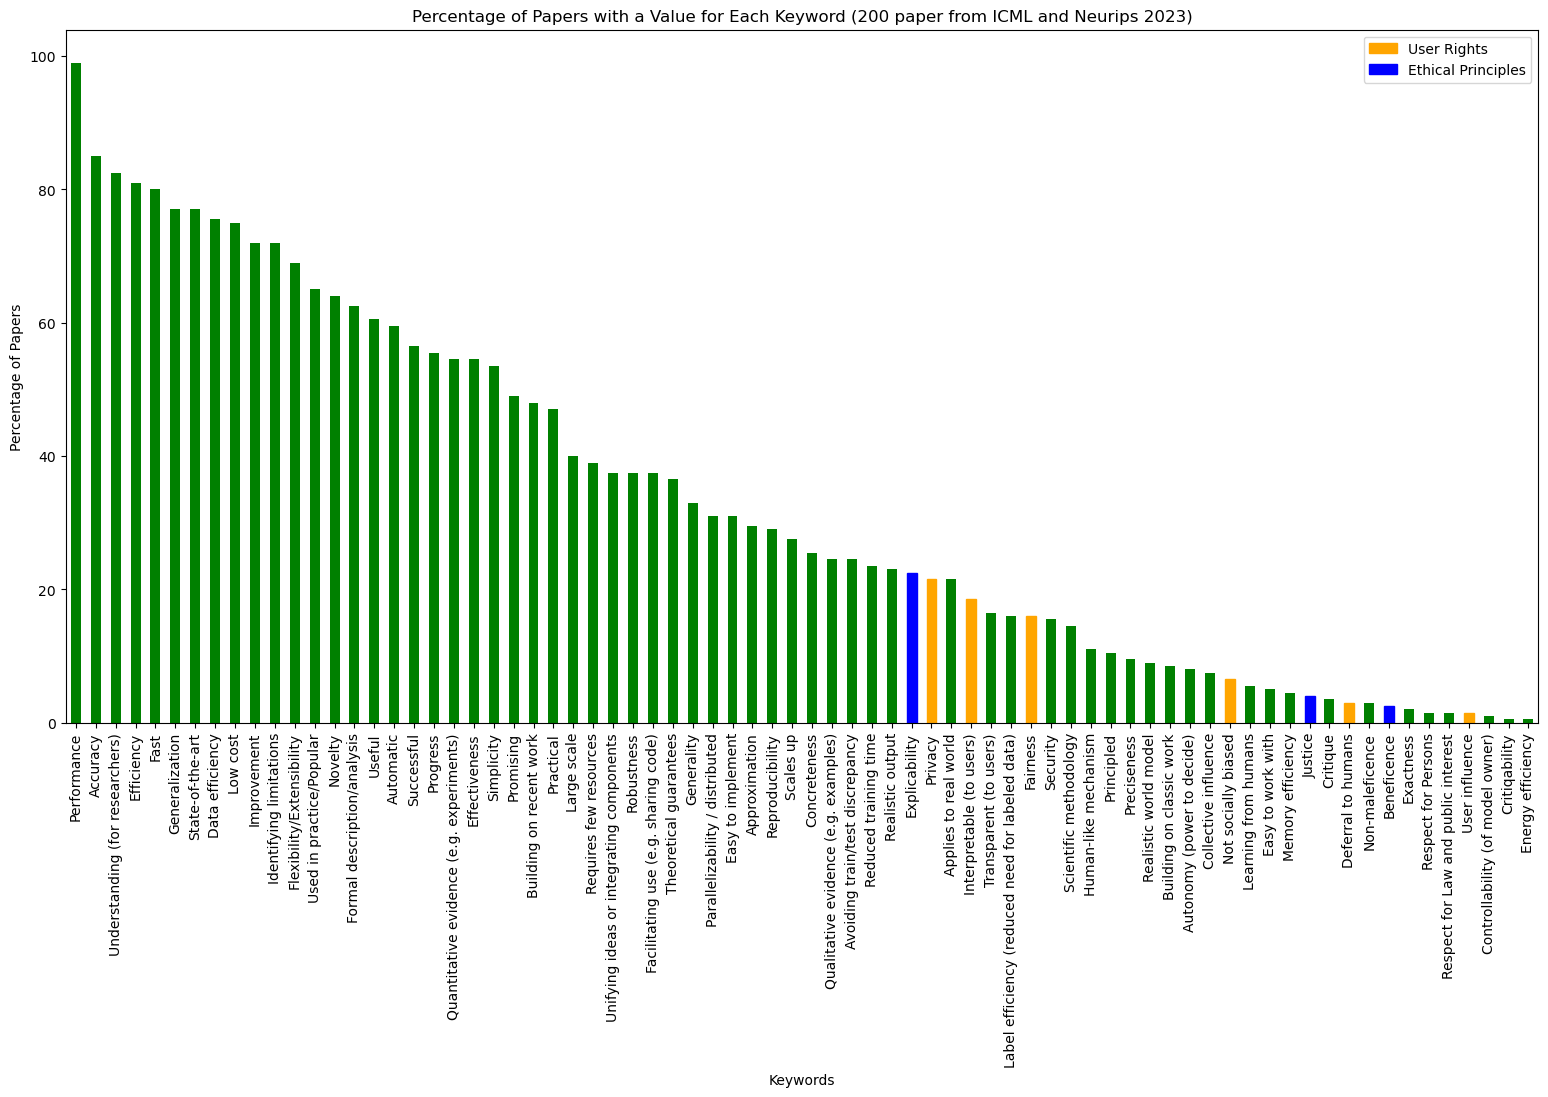

In [3]:
# Combine the two dataframes
combined_df = pd.concat([keyword_matrix_neurips, keyword_matrix_icml])

# Calculate the percentage of papers with a value for each keyword
percentage_with_value = (combined_df.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted = percentage_with_value.sort_values(ascending=False)

# Define the keywords to be highlighted in red
highlight_keywords_user_rights = ['Interpretable (to users)', 'Deferral to humans', 'Privacy', 'User influence', 'Not socially biased', 'Fairness']
highlight_keywords_ethics = ['Beneficence', 'Non-maleficience', 'Resprect for Law and Public Interest', 'Explicability', 'Autonomy (Power to decide)', 'Justice']

# Plot the percentages
plt.figure(figsize=(19, 9))
bars = percentage_with_value_sorted.plot(kind='bar', color='green')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted.index:
        bars.patches[percentage_with_value_sorted.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted.index:
        bars.patches[percentage_with_value_sorted.index.get_loc(keyword)].set_color('blue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value for Each Keyword (200 paper from ICML and Neurips 2023)')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('plots/percentage_both_conferences.png')

plt.show()

In [39]:
# Calculate the percentage of papers with a value for each keyword for NeurIPS
percentage_with_value_neurips = (keyword_matrix_neurips.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_neurips = percentage_with_value_neurips.sort_values(ascending=False)

# Calculate the percentage of papers with a value for each keyword for ICML
percentage_with_value_icml = (keyword_matrix_icml.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_icml = percentage_with_value_icml.sort_values(ascending=False)

# Define the keywords to be highlighted in red
highlight_keywords_user_rights = ['Interpretable (to users)', 'Deferral to humans', 'Privacy', 'User influence', 'Not socially biased', 'Fairness']
highlight_keywords_ethics = ['Beneficence', 'Non-Maleficence', 'Respect for Law and Public Interest', 'Explicability', 'Autonomy (Power to decide)', 'Justice']

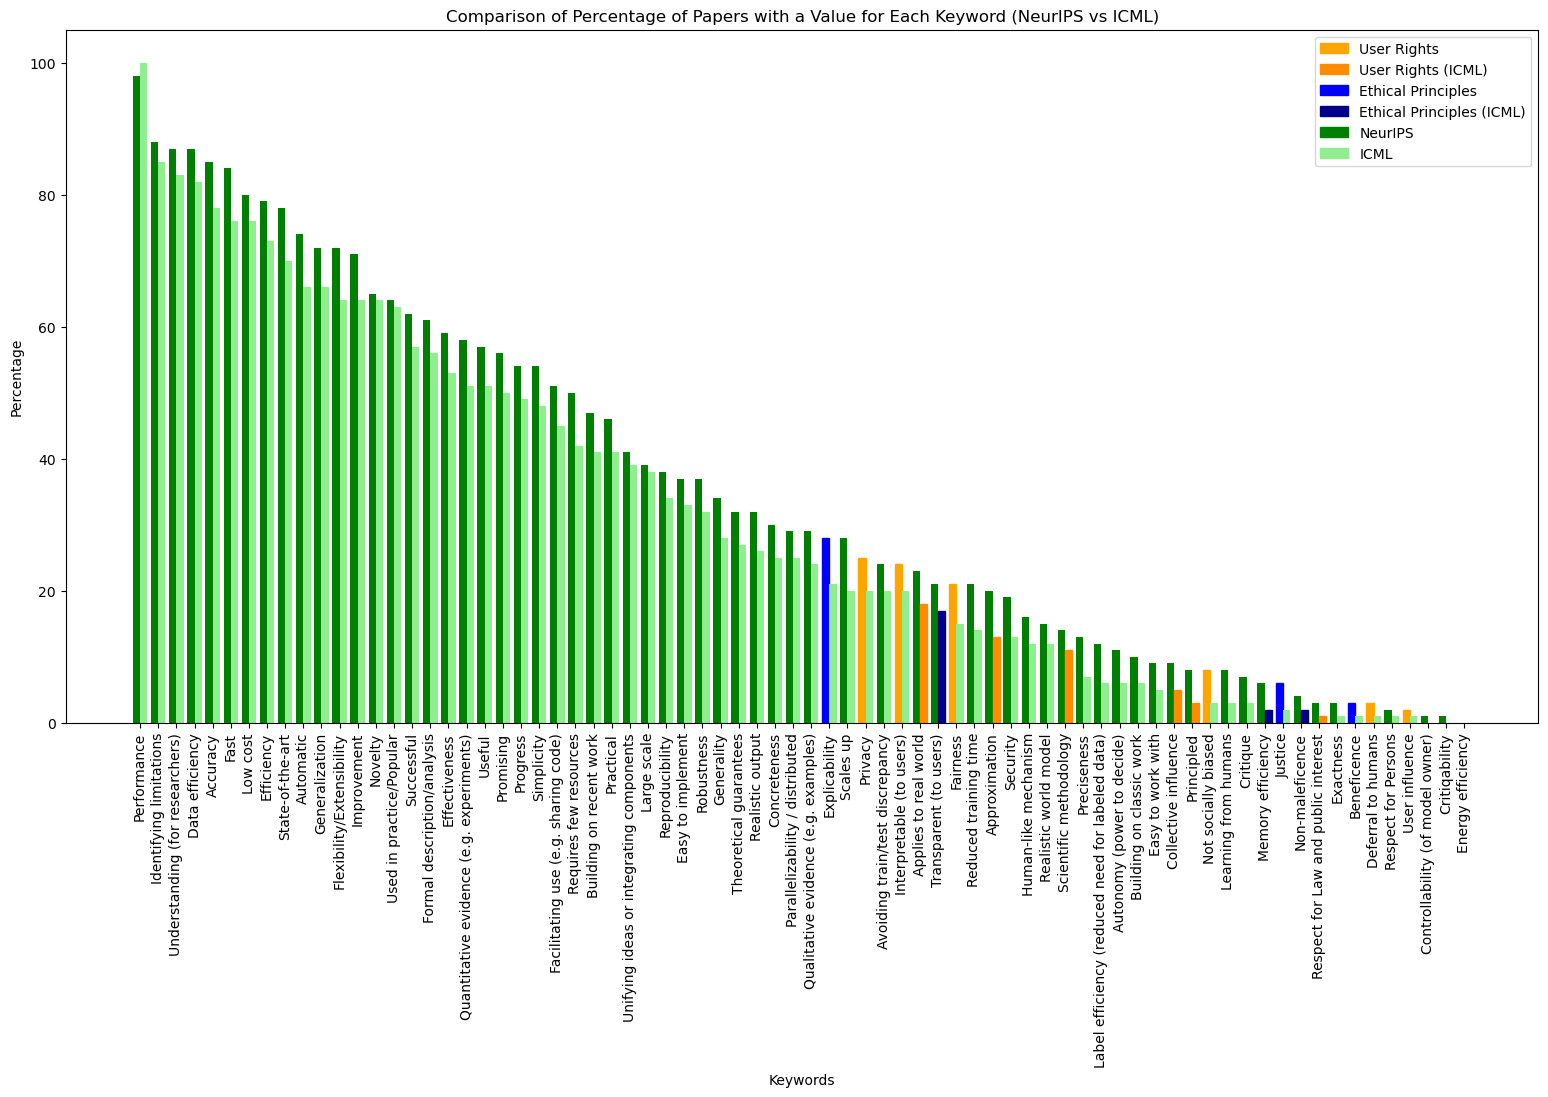

<Figure size 640x480 with 0 Axes>

In [40]:
# Combine the percentage dataframes for NeurIPS and ICML
melted_percentage_df = pd.concat([
    percentage_with_value_sorted_neurips.rename('Percentage').reset_index().assign(Conference='NeurIPS'),
    percentage_with_value_sorted_icml.rename('Percentage').reset_index().assign(Conference='ICML')
])
melted_percentage_df.columns = ['Keyword', 'Percentage', 'Conference']

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(19, 9))

# Define bar width and positions
bar_width = 0.4
positions_neurips = range(len(percentage_with_value_sorted_neurips))
positions_icml = [p + bar_width for p in positions_neurips]

# Plot NeurIPS bars
bars_neurips = ax.bar(positions_neurips, percentage_with_value_sorted_neurips, width=bar_width, label='NeurIPS', color='green')

# Plot ICML bars
bars_icml = ax.bar(positions_icml, percentage_with_value_sorted_icml, width=bar_width, label='ICML', color='lightgreen')

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted_neurips.index:
        bars_neurips[percentage_with_value_sorted_neurips.index.get_loc(keyword)].set_color('orange')
    if keyword in percentage_with_value_sorted_icml.index:
        bars_icml[percentage_with_value_sorted_icml.index.get_loc(keyword)].set_color('darkorange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted_neurips.index:
        bars_neurips[percentage_with_value_sorted_neurips.index.get_loc(keyword)].set_color('blue')
    if keyword in percentage_with_value_sorted_icml.index:
        bars_icml[percentage_with_value_sorted_icml.index.get_loc(keyword)].set_color('darkblue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
darkorange_patch = mpatches.Patch(color='darkorange', label='User Rights (ICML)')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
darkblue_patch = mpatches.Patch(color='darkblue', label='Ethical Principles (ICML)')
plt.legend(handles=[orange_patch, darkorange_patch, blue_patch, darkblue_patch, mpatches.Patch(color='green', label='NeurIPS'), mpatches.Patch(color='lightgreen', label='ICML')])

plt.title('Comparison of Percentage of Papers with a Value for Each Keyword (NeurIPS vs ICML)')
plt.xlabel('Keywords')
plt.ylabel('Percentage')
plt.xticks([p + bar_width / 2 for p in positions_neurips], percentage_with_value_sorted_neurips.index, rotation=90)
plt.show()

# Save the plot
plt.savefig('plots/percentage_comparison_conferences.png')

In [41]:
# Read the values.csv file
values_df = pd.read_csv('values.csv')

# Merge values_df with percentage_with_value
merged_df = values_df.merge(percentage_with_value.reset_index(), left_on='Value', right_on='index')
merged_df.drop('index', axis=1, inplace=True)

# rename columns to value, birhane percentage and percentage 2023
merged_df.columns = ['Value', 'Birhane Percentage', 'Percentage 2023']
merged_df

,Value,Birhane Percentage,Percentage 2023
0,Performance,96.0,99.0
1,Generalization,89.0,77.0
2,Quantitative evidence (e.g. experiments),85.0,54.5
3,Efficiency,84.0,81.0
4,Novelty,77.0,64.0
...,...,...,...
56,Fairness,1.0,16.0
57,Collective influence,1.0,7.5
58,Autonomy (power to decide),0.0,8.0
59,Respect for Persons,0.0,1.5


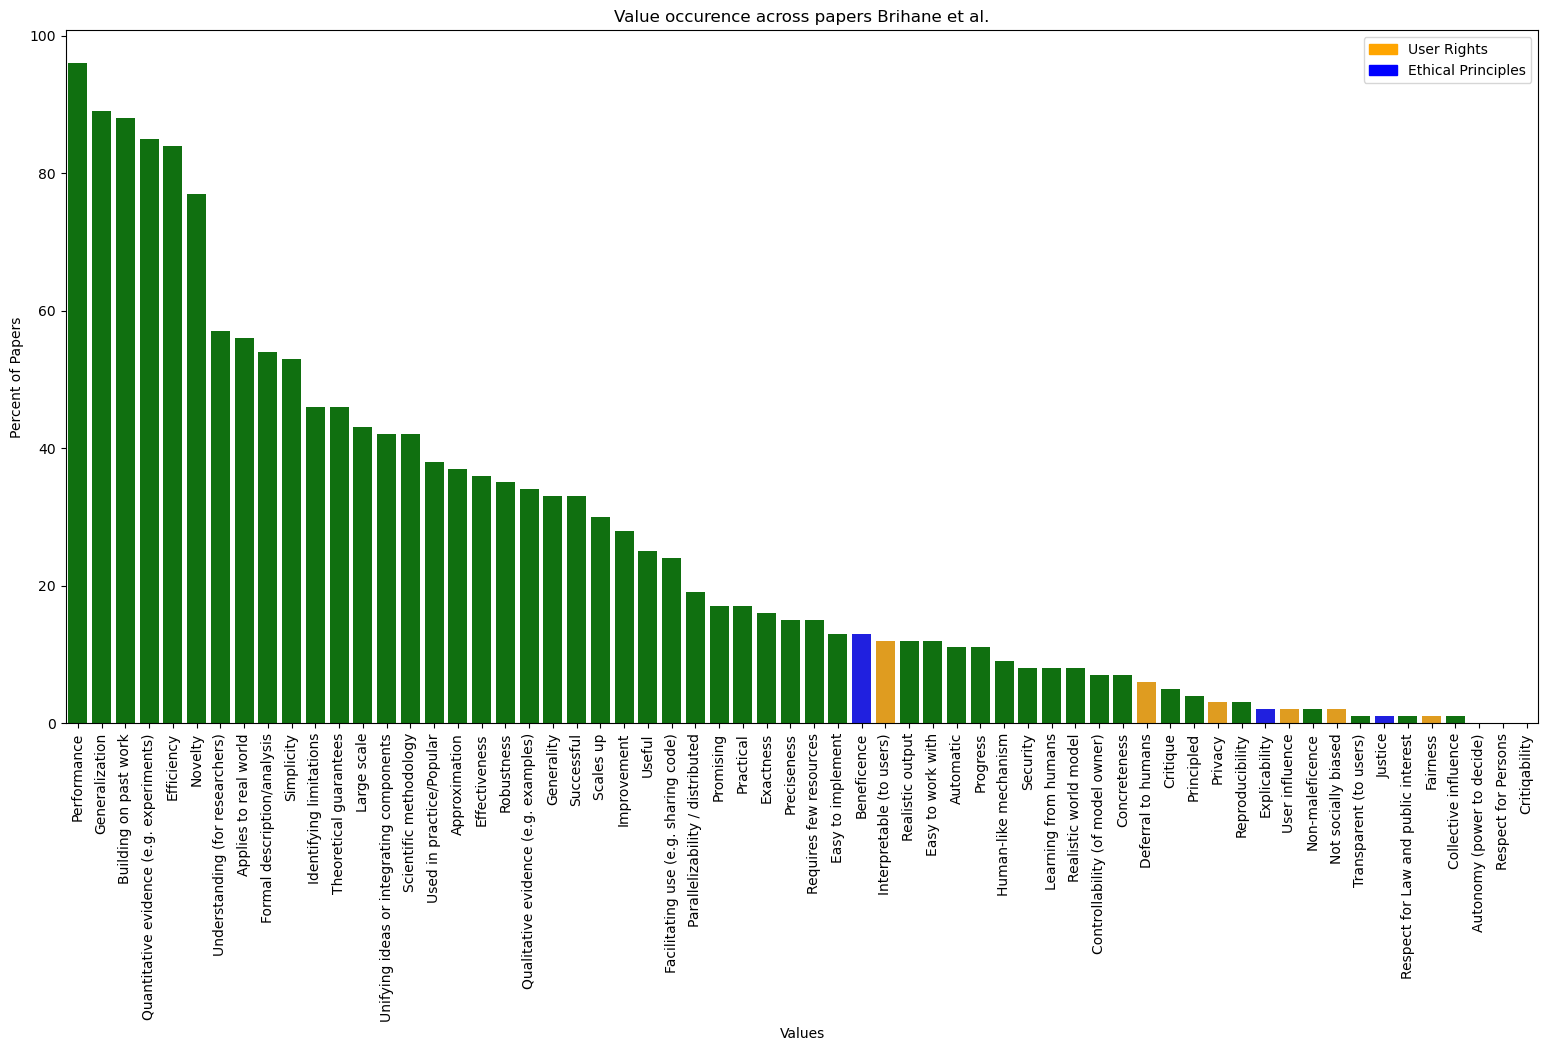

In [42]:
# Sort the dataframe by 'Percent of papers' in descending order
values_df_sorted = values_df.sort_values(by='Percent of papers', ascending=False)

# Add a column for color
values_df_sorted['Color'] = 'green'
values_df_sorted.loc[values_df_sorted['Value'].isin(highlight_keywords_user_rights), 'Color'] = 'orange'
values_df_sorted.loc[values_df_sorted['Value'].isin(highlight_keywords_ethics), 'Color'] = 'blue'

# Plot the sorted dataframe using seaborn
plt.figure(figsize=(19, 9))
bars_values = sns.barplot(data=values_df_sorted, x='Value', y='Percent of papers', hue='Color', dodge=False, palette={'green': 'green', 'orange': 'orange', 'blue': 'blue'})

plt.title('Value occurence across papers Brihane et al.')
plt.xlabel('Values')
plt.ylabel('Percent of Papers')
plt.xticks(rotation=90)

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.savefig('plots/values_birhane.png')


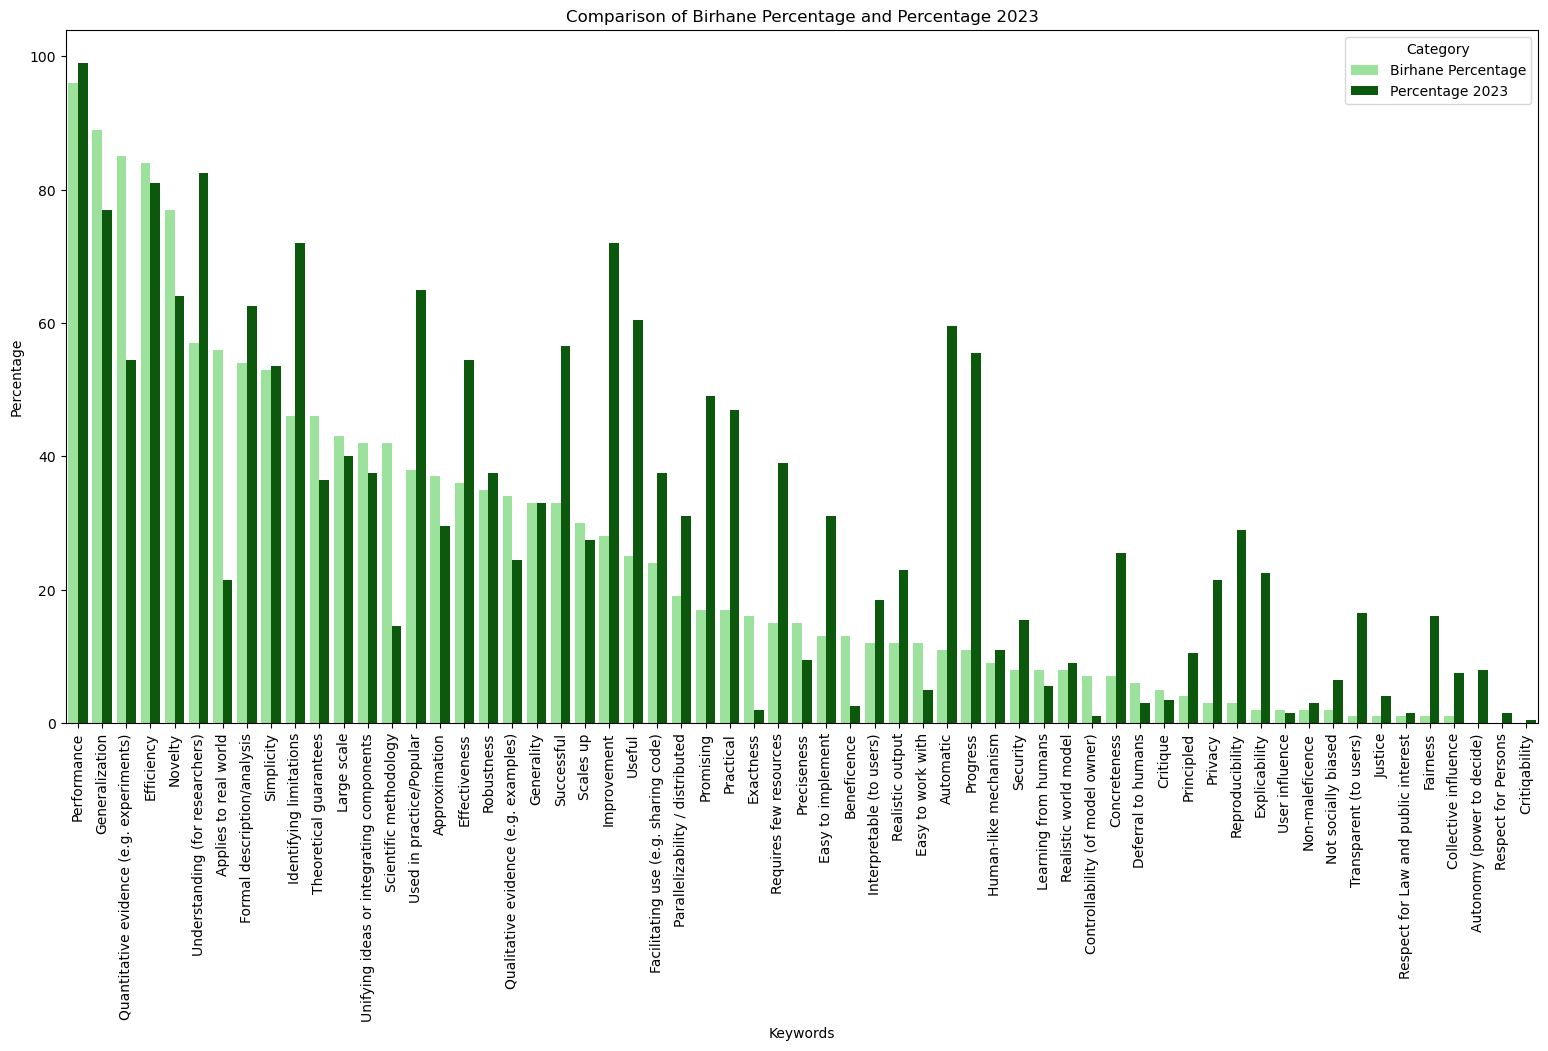

In [45]:
# Melt the dataframe for easier plotting with seaborn
melted_df = merged_df.melt(id_vars='Value', var_name='Category', value_name='Percentage')

# Plot using seaborn
plt.figure(figsize=(19, 9))
sns.barplot(data=melted_df, x='Value', y='Percentage', hue='Category', palette={'Birhane Percentage': 'lightgreen', 'Percentage 2023': 'darkgreen'})
plt.title('Comparison of Birhane Percentage and Percentage 2023')
plt.xlabel('Keywords')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Category')

# Save the plot
plt.savefig('plots/percentage_comparison_brihane.png')


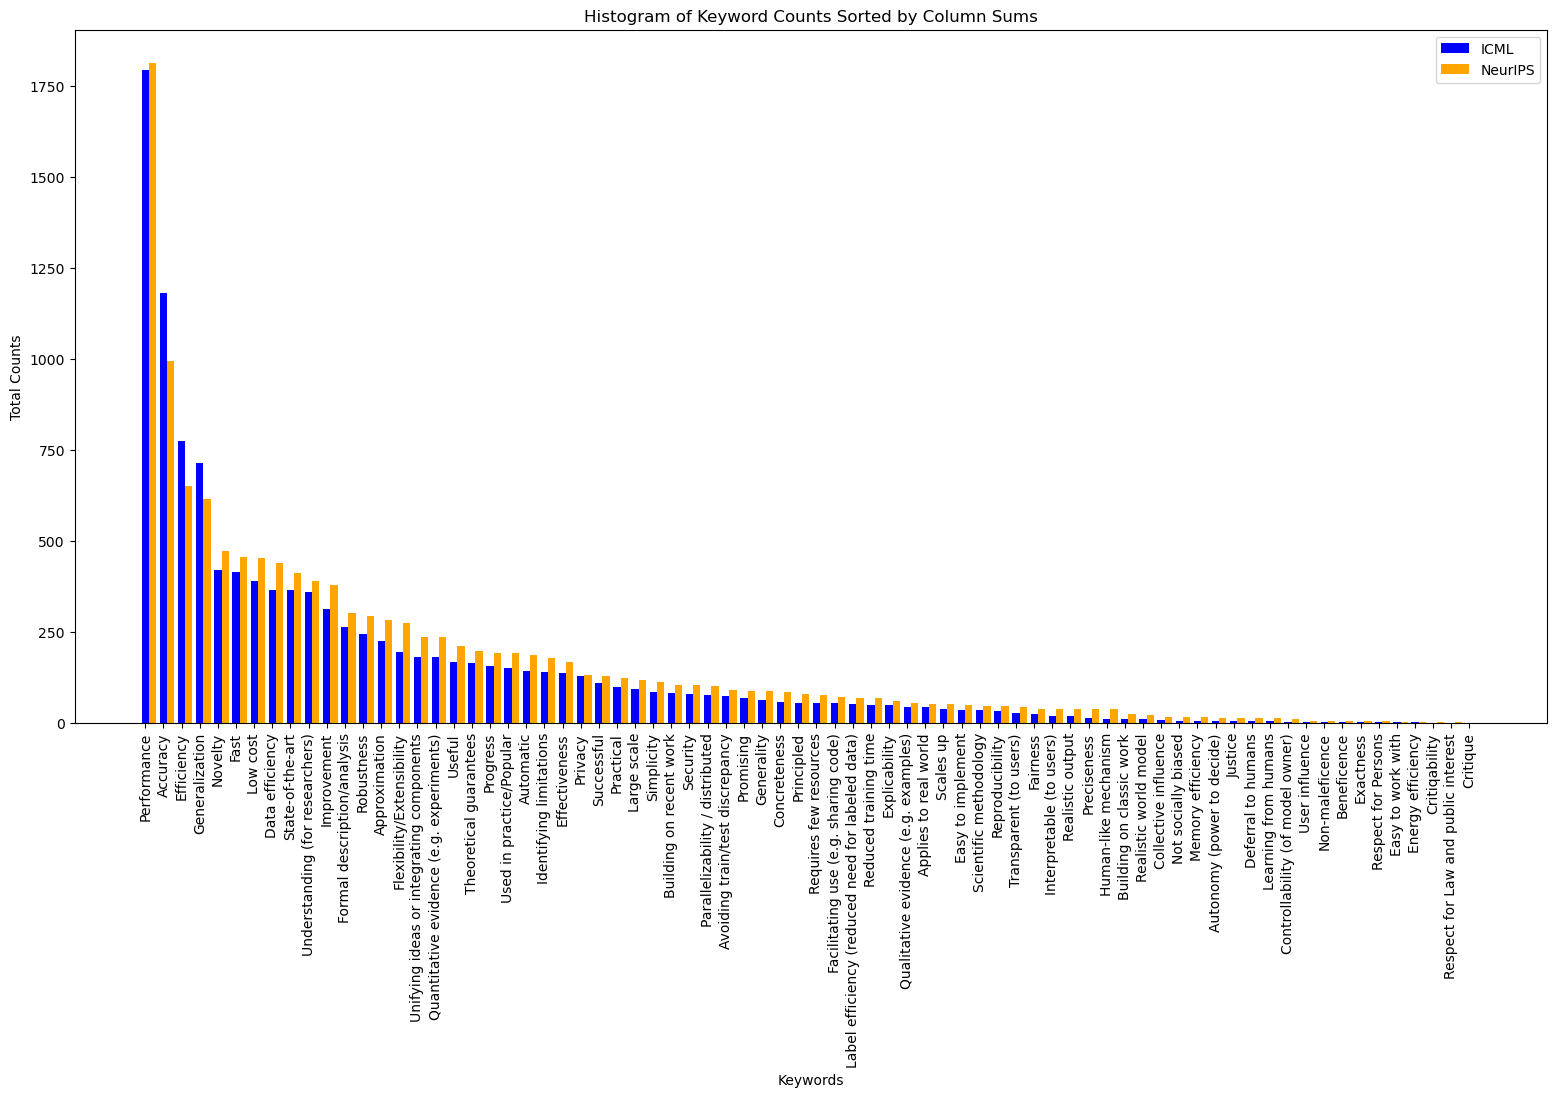

In [43]:
# Calculate the column sums
column_sums_icml = keyword_matrix_icml.iloc[:, 1:].sum().sort_values(ascending=False)
column_sums_neurips = keyword_matrix_neurips.iloc[:, 1:].sum().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(19, 9))
width = 0.4  # the width of the bars

# Create positions for the bars
positions_icml = range(len(column_sums_icml))
positions_neurips = [p + width for p in positions_icml]

# Plot the bars
plt.bar(positions_icml, column_sums_icml, width=width, label='ICML', color='blue')
plt.bar(positions_neurips, column_sums_neurips, width=width, label='NeurIPS', color='orange')

# Add legend
plt.legend()
plt.title('Histogram of Keyword Counts Sorted by Column Sums')
plt.xlabel('Keywords')
plt.ylabel('Total Counts')
plt.xticks(ticks=positions_icml, labels=column_sums_icml.index, rotation=90)
plt.savefig('plots/histogram_keyword_counts_total_number.png')